In [90]:
%matplotlib inline
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr

In [91]:
import h5py

In [92]:
filename = '../data/reef_mask/compiled_5km_reef_mask_for_edit_20171113_buffer4pix.h5'

In [93]:
f = h5py.File(filename, 'r')

In [7]:
print("Keys: %s" % f.keys())

Keys: KeysView(<HDF5 file "compiled_5km_reef_mask_for_edit_20171113_buffer4pix.h5" (mode r)>)


In [94]:
f.keys()

KeysView(<HDF5 file "compiled_5km_reef_mask_for_edit_20171113_buffer4pix.h5" (mode r)>)

In [95]:
list(f.keys())

['landmask', 'lat', 'lon', 'mask']

In [101]:
lat = list(f.keys())[1]
lat = np.array(f[lat])

In [102]:
lon = list(f.keys())[2]
lon = np.array(f[lon])

In [104]:
lat

array([-89.97499847, -89.92501068, -89.87500763, ...,  89.875     ,
        89.92499542,  89.97499847], dtype=float32)

In [105]:
land_mask = list(f.keys())[0]

In [106]:
land_mask = np.array(f[land_mask])

In [107]:
land_mask.shape

(3600, 7200)

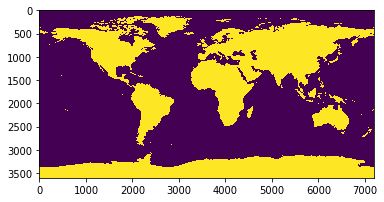

In [121]:
plt.imshow(land_mask)

In [109]:
reef_mask = list(f.keys())[-1]

In [110]:
reef_mask = np.array(f[reef_mask])

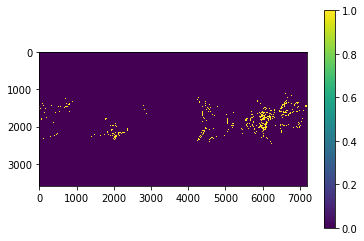

In [111]:
plt.imshow(reef_mask); plt.colorbar()

In [112]:
reef_mask = reef_mask[::-1,:]

In [113]:
land_mask = land_mask[::-1,:]

In [114]:
lat = lat[::-1]

In [120]:
lat

array([ 89.97499847,  89.92499542,  89.875     , ..., -89.87500763,
       -89.92501068, -89.97499847], dtype=float32)

In [115]:
d = {}

In [116]:
d['lat'] = (('lat',), lat)
d['lon'] = (('lon',), lon)
d['reef_mask'] = (('lat','lon'), reef_mask)
d['land_mask'] = (('lat','lon'), land_mask)


In [117]:
dset = xr.Dataset(d)

In [118]:
dset

<xarray.Dataset>
Dimensions:    (lat: 3600, lon: 7200)
Coordinates:
  * lon        (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...
  * lat        (lat) float32 89.975 89.925 89.875 89.825 89.775 89.725 ...
Data variables:
    reef_mask  (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
    land_mask  (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

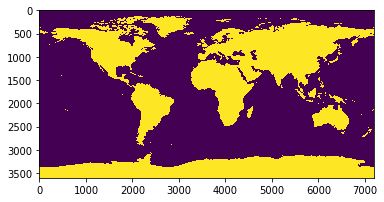

In [122]:
plt.imshow(dset['land_mask'].data)

In [126]:
dset.to_netcdf('../data/reef_mask/compiled_5km_reef_mask_for_edit_20171113_buffer4pix.nc')

In [127]:
dset.close()